# EDA of the DGA Detection dataset

This notebook will explore the DGA Detection dataset to find features that can be used to build a model that can distinguish whether a domain name is legit or created by a domain generating algorithm (DGA).

It will consist of two parts:
* Feature engineering, creating useful, numeric features from the data that can be interpreted by machine learning models
* Model comparison, training the created features on different models to find the best one to use

### Feature Engineering

We'll start by importing pandas, reading the data in, and looking at the shape and first few rows

In [1]:
import pandas as pd

df = pd.read_csv('../data/dga_domains.csv')
df.shape

(133926, 4)

In [2]:
df.head()

,host,domain,class,subclass
0,000directory.com.ar,000directory,legit,legit
1,000webhost.com,000webhost,legit,legit
2,001fans.com,001fans,legit,legit
3,01-telecharger.com,01-telecharger,legit,legit
4,010shangpu.com,010shangpu,legit,legit


The CSV has 133,926 rows and four columns. The last two are the classes to be predicted and the first two are the domain names with and without their suffix. We'll look at a few domain names that are legit and a few that aren't to see if there are any immediate features that we can extract.

In [3]:
df[df['class'] == 'legit'].sample(20)

,host,domain,class,subclass
51462,hazecash.com,hazecash,legit,legit
47265,getglue.com,getglue,legit,legit
20442,brendansadventures.com,brendansadventures,legit,legit
16906,belvilla.nl,belvilla,legit,legit
80568,netprospex.com,netprospex,legit,legit
11218,allworldphone.com,allworldphone,legit,legit
23585,celebratewomantoday.com,celebratewomantoday,legit,legit
89069,photomania.me,photomania,legit,legit
15928,bangkok.go.th,bangkok,legit,legit
40023,exxonmobil.com,exxonmobil,legit,legit


In [4]:
df[df['class'] != 'legit'].sample(20)

,host,domain,class,subclass
34120,drcfouwpsrwkt.ru,drcfouwpsrwkt,dga,cryptolocker
55450,hyrstbtyqnurii.ru,hyrstbtyqnurii,dga,cryptolocker
4937,1sdn9et1wzdp5qwdakfv1x2o1m1.net,1sdn9et1wzdp5qwdakfv1x2o1m1,dga,newgoz
12553,aokdejitqhngqw.ru,aokdejitqhngqw,dga,cryptolocker
49372,gpngtkevsnnna.ru,gpngtkevsnnna,dga,cryptolocker
59328,irtxxlzpbagyirqklojdqkylmj.ru,irtxxlzpbagyirqklojdqkylmj,dga,goz
93515,pxbrpfwllgqxjr.ru,pxbrpfwllgqxjr,dga,cryptolocker
98540,rjx3qlcipkewh90zdxgna0gd.com,rjx3qlcipkewh90zdxgna0gd,dga,newgoz
59748,iugdsgvnbwiwlr.ru,iugdsgvnbwiwlr,dga,cryptolocker
29262,cvsdmzlhidrsqoykzusmvnj.ru,cvsdmzlhidrsqoykzusmvnj,dga,goz


The most noticeable difference between dga and legit domains is that dga domains tend to be longer. They're also made up of characters selected at random, while legit domains are more readable.

We can turn these into numeric features by adding domain length and the percentage of vowels in the domain as columns, since readable words tend to have more vowels than strings with random characters.

Dga domains also seem to have less variety in the suffixes they use. We'll check the data for all the different suffixes used by dga domains.

In [5]:
# Get domain length as column
df['dom_len'] = [len(i) for i in df['domain'].tolist()]

# Get number of vowels in domain and divide by domain length
df['vowels'] = [len(list(filter(lambda x: x in ['a','e','i','o','u'], i))) for i in df['domain'].tolist()]
df['vowels'] /= df['dom_len']

# Get domain suffix as column and list suffixes used by dga domains
df['suffix'] = [i.split('.')[-1] for i in df['host'].tolist()]
df[df['class'] != 'legit']['suffix'].unique()


array(['net', 'org', 'com', 'biz', 'ru'], dtype=object)

From the data, dga domains tend to only use net, org, com, biz, or ru as their domain suffix. Assuming that this data reflects what domains the final model will be up against in the real world, we'll create boolean columns for each of these. 

In [6]:
for suffix in ['net', 'org', 'com', 'biz', 'ru']:
    df[suffix] = (df['suffix'] == suffix).astype(int)

Now that we have two numeric and five boolean features that we can use as model inputs, we can check the correlations between each feature and class to get an idea of how effective they'll be for the model.

We'll convert the class column into a boolean column called is_dga, so that pandas' correlation method can interpret it.

In [7]:
df['is_dga'] = (df['class'] == 'dga').astype(int)
df.corr()

,dom_len,vowels,net,org,com,biz,ru,is_dga
dom_len,1.000000,-0.495590,0.169691,0.186159,-0.179850,0.227720,0.232002,0.621028
vowels,-0.495590,1.000000,-0.061139,-0.080732,0.299697,-0.124840,-0.483289,-0.697489
net,0.169691,-0.061139,1.000000,-0.052836,-0.185082,-0.033296,-0.182010,0.022144
org,0.186159,-0.080732,-0.052836,1.000000,-0.145615,-0.026196,-0.143198,0.050613
com,-0.179850,0.299697,-0.185082,-0.145615,1.000000,-0.091764,-0.501617,-0.486113
biz,0.227720,-0.124840,-0.033296,-0.026196,-0.091764,1.000000,-0.090241,0.118361
ru,0.232002,-0.483289,-0.182010,-0.143198,-0.501617,-0.090241,1.000000,0.788745
is_dga,0.621028,-0.697489,0.022144,0.050613,-0.486113,0.118361,0.788745,1.000000


Domain length, vowel percentage, and the com and ru suffixes all have relatively strong correlations with is_dga, which suggests they'll be helpful for each models' ability to predict the correct class in the next section.


## Model Comparison

Now that we have our features, we can train different types of models and compare their results. The models we'll try are:
* Logistic Regression
* Decision Tree Classifier
* Random Forest Classifier
* K-Nearest Neighbour
* Linear Discriminant Analysis
* Gaussian Naive Bayes

Model performance will be based on accuracy, the percentage of test set values classified correctly.

We'll compare each model's performance using k-fold cross validation, which splits the data into a given number of groups. Each group is treated as a test set while the model is trained on the rest of the data. This provides a mean and standard deviation on how well each model performs overall, rather than just on a single test set. The results will be plot in a boxplot once the training has completed.

Logistic Regression, Mean: 0.9934, Std: 0.0005
Decision Tree, Mean: 0.9968, Std: 0.0005
Random Forest, Mean: 0.9968, Std: 0.0005
K-Nearest Neighbour, Mean: 0.9968, Std: 0.0002
Linear Discriminant Analysis, Mean: 0.9812, Std: 0.0007
Naive Bayes, Mean: 0.9747, Std: 0.0014


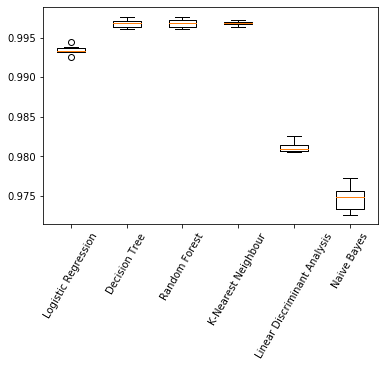

In [8]:
# Import necessary modules
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Split data into X (features) and y (class to predict)
features = ['dom_len', 'vowels', 'com', 'ru']
X = df[features].values
y = df['is_dga'].tolist()

# Create dictionary of models to loop through
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('K-Nearest Neighbour', KNeighborsClassifier()),
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('Naive Bayes', GaussianNB())
]

results, names = [], []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(result)
    names.append(name)
    print(f'{name}, Mean: {round(result.mean(),4)}, Std: {round(result.std(),4)}')
    
pyplot.boxplot(results, labels=names)
pyplot.xticks(rotation=60)
pyplot.show()

The decision tree, random forest and k-nearest neighour models performed the best, having the highest mean accuracy with minimal range. The difference between these three are insignificant enough to ignore. Instead we'll select the decision tree classifier as its the quickest to train/run and simplest to understand. We'll display the decision tree model below.

In [9]:
from dtreeplt import dtreeplt

model = DecisionTreeClassifier()
model.fit(X, y)

dtree = dtreeplt(
    model=model,
    feature_names=features,
    target_names=['legit', 'dga']
)
fig = dtree.view()
# fig.savefig('decision_tree.png')